## Spectral Analysis of EEG data

In [151]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal as signal

In [203]:
def plot(x, y):
    plt.plot(x, y)
    plt.show()
    
def logplot(x, y):
    plt.semilogy(x, y)
    plt.show()

## Testing around with Spectral Analysis

### White noise

In [314]:
x = np.random.randn(100000)

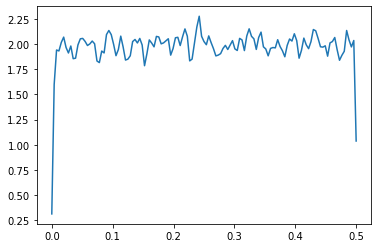

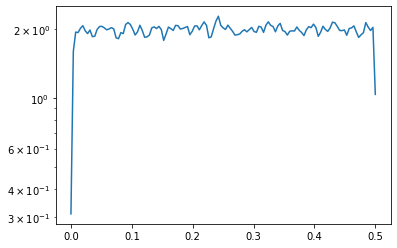

In [315]:
plot(*signal.welch(x))
logplot(*signal.welch(x))

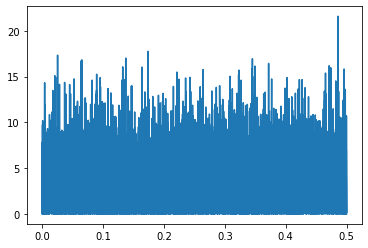

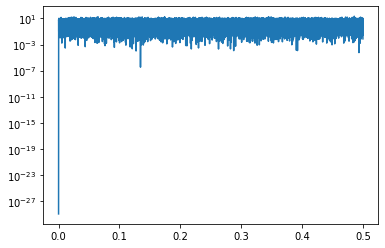

In [316]:
plot(*signal.periodogram(x))
logplot(*signal.periodogram(x))

### Gaussian pulse

In [212]:
def gauss(x, mu=0., sigma=1.):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-.5 * ((x-mu)/sigma)**2)

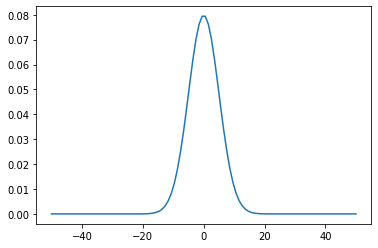

In [304]:
x = np.linspace(-50,50,100)
y = gauss(x, mu=0, sigma=5)
plot(x, y)

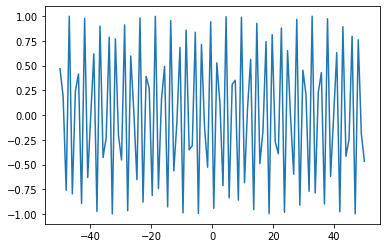

In [308]:
z = np.sin(10*x)
plot(x, z)

#### Fold sine wave with gaussian 

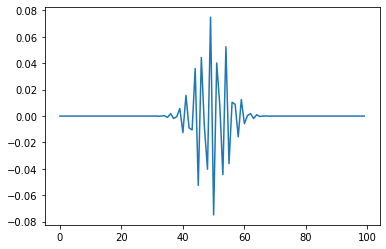

In [440]:
c = y*z
plt.plot(c)
plt.show()

#### Frequency profile of pulse is again Gaussian (as it should be)

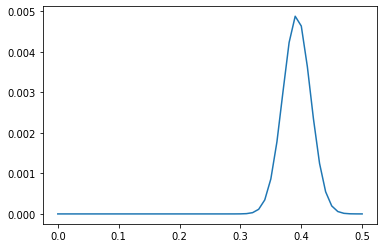

In [443]:
plot(*signal.periodogram(c, fs=1))

## Data Analysis

### EEG data

In [263]:
data_raw =  np.load('data_pre.npy').T
data_raw.shape

(697655, 120)

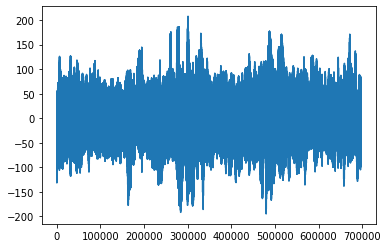

In [332]:
data = data_raw[:, 0]
plt.plot(data)
plt.show()

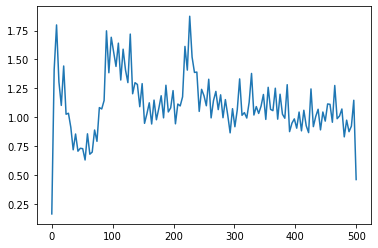

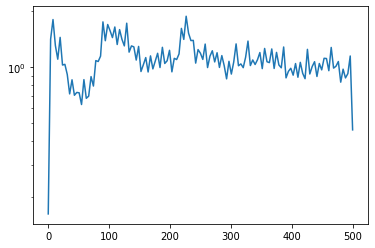

In [270]:
plot(*signal.welch(data, fs=1000))
logplot(*signal.welch(data, fs=1000))

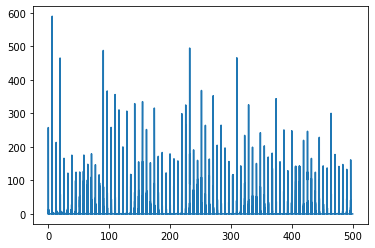

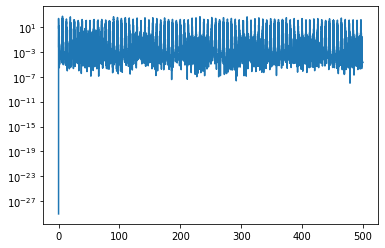

In [271]:
plot(*signal.periodogram(data, fs=1000))
logplot(*signal.periodogram(data, fs=1000))

### Testing different time scales

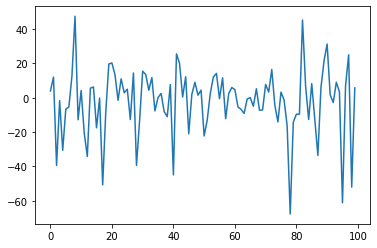

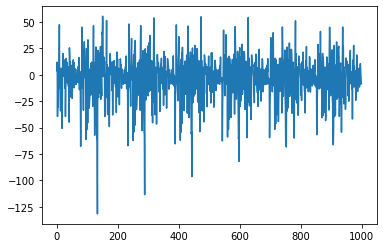

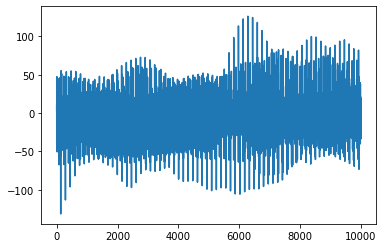

In [372]:
plt.plot(data[:100])
plt.show()
plt.plot(data[:1000])
plt.show()
plt.plot(data[:10000])
plt.show()

#### Smoothen data by convolution with Gaussian kernel 

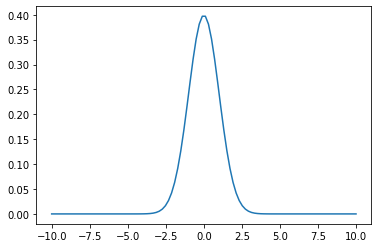

In [426]:
x = np.linspace(-10, 10, 100)
kernel = gauss(x, sigma=1)
plot(x, kernel)

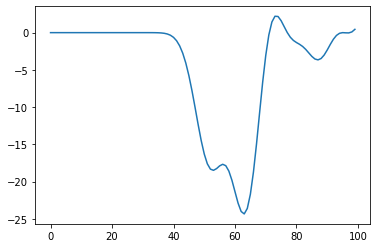

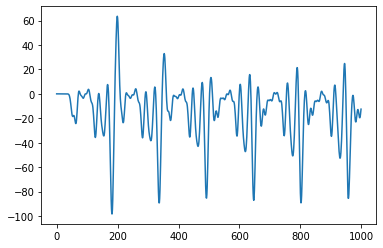

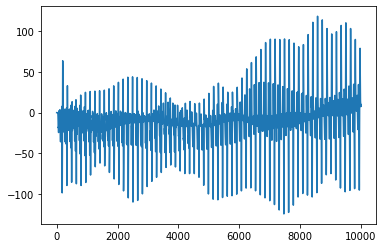

In [427]:
data_smooth = np.convolve(kernel, data)
plt.plot(data_smooth[:100])
plt.show()
plt.plot(data_smooth[:1000])
plt.show()
plt.plot(data_smooth[:10000])
plt.show()

#### Frequencies above 50 got filtered out by Gaussian kernel smoothing

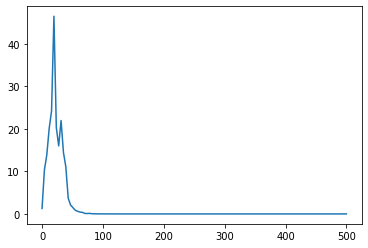

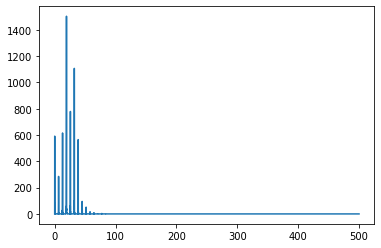

In [432]:
plot(*signal.welch(c, fs=1000))
plot(*signal.periodogram(c, fs=1000))

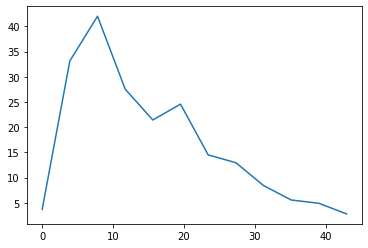

In [448]:
f, p = signal.welch(data_smooth, fs=1000)
length = int(f.shape[0]/10)
plot(f[:length], p[:length])

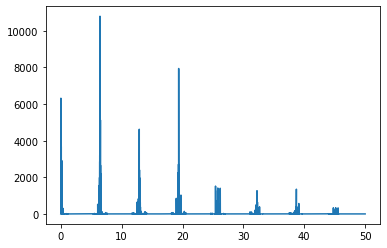

In [449]:
f, p = signal.periodogram(data_smooth, fs=1000)
length = int(f.shape[0]/10)
plot(f[:length], p[:length])

Why are the frequency peaks in so **regular** intervals?